# 1. Data Processing, Formatting and Cleaning
The first task will be to transform the raw data we have. Those were extracted from the website autocasion.com and stored in a csv file. Then, translated into English in the notebook 0_translation.ipynb. 

The goal is to get a clean dataset ready to be analyzed for EDA by: 
- dealing with NaN's
- removing duplicates
- converting data to the proper data types

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# there are mixed types, it is recommended to use low_memory=False to avoid errors when pandas is reading
# this way, pandas reads all the file before deciding which data type should assign to each column, instead of reading it in chunks
df = pd.read_csv('../data/data_raw_en.csv', low_memory=False)  

___________________________________________
## Data frame basic info

In [4]:
df.shape

(106431, 29)

In [5]:
df.head()


,registration_date,fuel_type_1,mileage_km,body_type_1,transmission,power_hp,warranty_months,color,emissions_label,price,...,seats,fuel_type_2,engine_displacement_cm3,cylinders,turbo,consumption_city_l_100km,consumption_highway_l_100km,consumption_mixed_l_100km,co2_g_km,tank_capacity_l
0,02/2023,Petrol,3.900 km,Sedan,Manual,179,12 months,Negro,C,29.000 €,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/2023,Petrol,4.000 km,Sedan,Manual,180,24 months,Gris,C,30.500 €,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/2023,Electric,1 km,Sedan,Automatic,154,36 months,Azul Poisson (metalizado)\n ...,0 EMISSIONS,43.800 €,...,4.0,Electric,0.0,NaN,Turbo,"0,00","0,00","0,00",-,"0,00"
3,10/2023,Electric,7 km,Sedan,Automatic,154,36 months,PUNKN METALLIC,0 EMISSIONS,38.990 €,...,4.0,Electric,0.0,NaN,Turbo,"0,00","0,00","0,00",-,"0,00"
4,08/2023,Electric,10 km,Sedan,Automatic,154,36 months,Verde,0 EMISSIONS,35.990 €,...,4.0,Electric,0.0,NaN,Turbo,"0,00","0,00","0,00",-,"0,00"


In [6]:
df['tank_capacity_l'][20:50]

20    35,00
21    35,00
22    35,00
23     0,00
24      NaN
25      NaN
26      NaN
27      NaN
28     0,00
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35    58,00
36      NaN
37    58,00
38    58,00
39      NaN
40    52,00
41    52,00
42    52,00
43    52,00
44    58,00
45    58,00
46    58,00
47    58,00
48    58,00
49      NaN
Name: tank_capacity_l, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106431 entries, 0 to 106430
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   registration_date            106404 non-null  object 
 1   fuel_type_1                  106366 non-null  object 
 2   mileage_km                   106404 non-null  object 
 3   body_type_1                  106260 non-null  object 
 4   transmission                 106364 non-null  object 
 5   power_hp                     106404 non-null  object 
 6   warranty_months              100572 non-null  object 
 7   color                        106404 non-null  object 
 8   emissions_label              98035 non-null   object 
 9   price                        106371 non-null  object 
 10  url                          106431 non-null  object 
 11  length_mm                    78550 non-null   object 
 12  width_mm                     78550 non-null   object 
 13 

In [8]:
df.columns

Index(['registration_date', 'fuel_type_1', 'mileage_km', 'body_type_1',
       'transmission', 'power_hp', 'warranty_months', 'color',
       'emissions_label', 'price', 'url', 'length_mm', 'width_mm', 'height_mm',
       'wheelbase_mm', 'trunk_volume_l', 'weight_kg', 'body_type_2', 'doors',
       'seats', 'fuel_type_2', 'engine_displacement_cm3', 'cylinders', 'turbo',
       'consumption_city_l_100km', 'consumption_highway_l_100km',
       'consumption_mixed_l_100km', 'co2_g_km', 'tank_capacity_l'],
      dtype='object')

_________________________________________________
## Compute the NaN's ratio for each variable 
We should know the ratio of missing values before jumping into any conclusion about what to do with them. But first, we need to do a bit of formatting with the 'price' column, as it contains NaN's and the string 'N/A' where there is no data. So,  we convert everything to a numeric type and input np.nan where needed.

In [9]:
df['price'] = df['price'].replace([np.nan, 'N/A'], 'nan')
df['price'] = df['price'].astype(str).apply(lambda x:x.replace('.', '').replace(' €', '') if x != 'nan' else np.nan).astype(float)

Now, we can create a df to store the NaN's % for each variable and plot it.

In [11]:
nan_per.head()

,parameter,NaNs %
0,cylinders,28.479
1,width_mm,26.196
2,turbo,26.196
3,engine_displacement_cm3,26.196
4,length_mm,26.196


In [12]:
nan_per.tail()

,parameter,NaNs %
24,registration_date,0.025
25,power_hp,0.025
26,color,0.025
27,mileage_km,0.025
28,url,0.000


<function matplotlib.pyplot.show(close=None, block=None)>

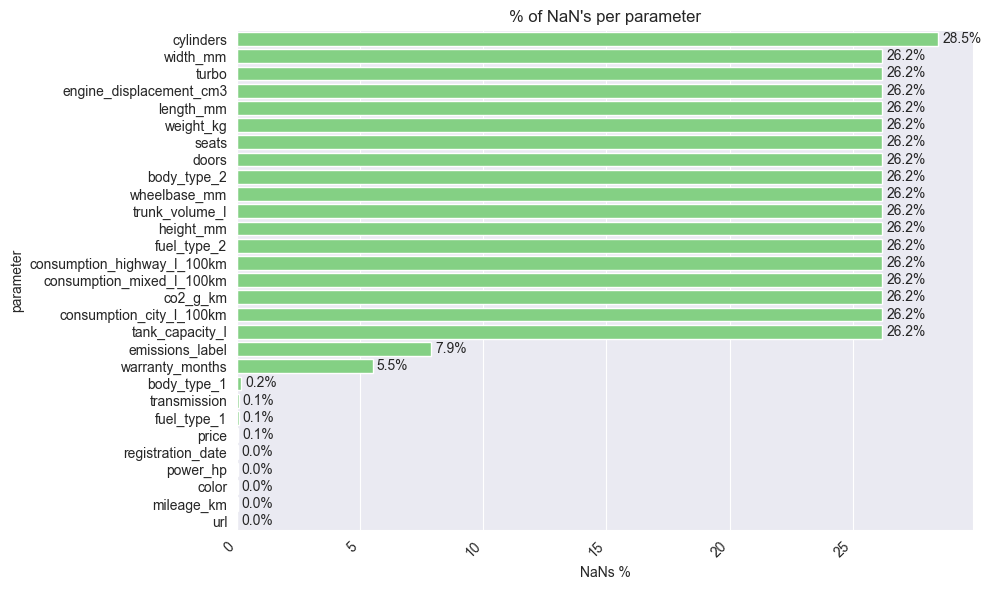

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.barplot(data=nan_per, x='NaNs %', y='parameter', color='#77DD77')

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3)

plt.title("% of NaN's per parameter")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show

As we can see here, there several parameters with a remarkable amount of NaN's (between 25 and 30%). Luckily, the target column has a very low amount.

_________________________
## Data Processing 
In this stage, we're going to give some format to the data to produce a clean dataframe, not ready for Machine Learning yet, but at least prepared to perform a proper EDA.

We can start dropping unnecessary data like duplicates or rows with minimum percentage of NaN's.

Thanks to df.info() we could see that there are a lot of object type columns, even those that should be numeric. So, let's start converting those to numeric type columns. We have to be carefull, as there re mixed data types in some of them. This can cause errors while processing.

#### Drop unnecessary data
One thing we can already do now is to get rid of the rows where there is a NaN in a variable with less than 1% of NaN's in the whole dataset. This won't impact remarkably in the algorithms performance, while keeping the vast majority of data. In this case, those are:

In [14]:
df.dropna(subset=['body_type_1', 'transmission', 'fuel_type_1', 'power_hp', 'price', 'mileage_km'], axis=0, inplace=True)

We have also detected that there are 2 duplicated columns: body_type and fuel_type (1 and 2). The ones with the index 1 have far less NaN's than the others, so we're going to drop fuel_type_2 and body_type_2 as well.

In [15]:
df.drop(columns=['body_type_2', 'fuel_type_2'], inplace=True)

Next, we're going to drop the columns 'Color' and 'url', as they won't be useful for the prediction models

In [16]:
df.drop(columns=['color', 'url'], inplace=True)

#### Extra useful columns
We also have the registration_date in the format MM/YYYY. It could be handy to have 2 different columns, one with the month and another with the year. 

We can do the same with thetrunk_capacity column. Divide it into 2 columns with one dimension in each one.

Let's do that and drop the originals, leaving the proper data type to the new columns already.

In [17]:
df['registration_month'] = df['registration_date'].apply(lambda x:x[0:2]).astype(int)
df['registration_year'] = df['registration_date'].apply(lambda x:x[-4:]).astype(int)

With the trunk_volume column, we have to trick Python, converting np.nan into strings with the same format than the rest, and then everything into floats.

In [18]:
df['trunk_dim_1'] = df['trunk_volume_l'].replace(np.nan, '-1/-1').apply(lambda x: x.split('/')[0]).replace('-1', np.nan).astype(float)
df['trunk_dim_2'] = df['trunk_volume_l'].replace(np.nan, '-1/-1').apply(lambda x: x.split('/')[1]).replace('-1', np.nan).astype(float)

In [19]:
df.drop(columns=['registration_date', 'trunk_volume_l'], inplace=True)

#### Deep data cleaning and formatting
Now, we have to work on the rest of the columns. Some of them require the same changes between them, others have to be dealt with individually. In the end, the following cells execute the data claening and formatting needed, leaving the appropriate data type in each one

For example, in the columns with the cars dimensions, there are several formats to indicate there is no data: np.nan, 'N/A' and '-'. So, we can map those to the string 'nan' and then convert it into an np.nan. The whole column can be converted into float type then.

In [20]:
columns_to_float = ['length_mm','width_mm','height_mm']

for col in columns_to_float:
    df[col] = df[col].replace([np.nan, 'N/A'], 'nan')
    df[col] = df[col].apply(lambda x: x.replace('-','nan').split(' ')[0])
    df[col] = df[col].replace('nan', np.nan).astype(float)

We can do the same trick to the following columns, just with a small change in format:

In [21]:
columns_to_float_2 = ['tank_capacity_l', 'consumption_city_l_100km', 'consumption_highway_l_100km', 'consumption_mixed_l_100km']

for col in columns_to_float_2:
    df[col] = df[col].replace(np.nan, '-1')
    df[col] = df[col].apply(lambda x: x.replace(',','.'))
    df[col] = df[col].replace('-1', np.nan).astype(float)

In [22]:
df.columns

Index(['fuel_type_1', 'mileage_km', 'body_type_1', 'transmission', 'power_hp',
       'warranty_months', 'emissions_label', 'price', 'length_mm', 'width_mm',
       'height_mm', 'wheelbase_mm', 'weight_kg', 'doors', 'seats',
       'engine_displacement_cm3', 'cylinders', 'turbo',
       'consumption_city_l_100km', 'consumption_highway_l_100km',
       'consumption_mixed_l_100km', 'co2_g_km', 'tank_capacity_l',
       'registration_month', 'registration_year', 'trunk_dim_1',
       'trunk_dim_2'],
      dtype='object')

With 'warranty_months', let's remove the word months, apply np.nan where we don't have data and 0 where there's no warranty.

In [23]:
df['warranty_months'] = df['warranty_months'].replace(np.nan, '-1').apply(lambda x: x.split(' ')[0])
df['warranty_months'] = df['warranty_months'].apply(lambda x: x.replace('No', '0').replace('Sí', '-1'))
df['warranty_months'] = df['warranty_months'].apply(lambda x:x.replace(' months', ''))
df['warranty_months'] = df['warranty_months'].replace('-1', np.nan).astype(float)

Now, let's format kilometers and power. We can directly drop the nan's in kilometers, since the ratio is very low, so it won't impact remarkably on the algorithms performances.

In [24]:
df["mileage_km"] = df["mileage_km"].apply(lambda x : float(x.split()[0].replace(".", "")))

In [25]:
df["power_hp"] = df["power_hp"].replace('-',np.nan).astype(float)

Finally, we add some np,nan in these columns:

In [26]:
df['co2_g_km'] = df['co2_g_km'].replace('-', np.nan).astype(float)
df['doors'] = df['doors'].replace('-', np.nan).astype(float)

Let's check again the data types: df.info()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106149 entries, 0 to 106430
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fuel_type_1                  106149 non-null  object 
 1   mileage_km                   106149 non-null  float64
 2   body_type_1                  106149 non-null  object 
 3   transmission                 106149 non-null  object 
 4   power_hp                     104039 non-null  float64
 5   warranty_months              95528 non-null   float64
 6   emissions_label              97841 non-null   object 
 7   price                        106149 non-null  float64
 8   length_mm                    78242 non-null   float64
 9   width_mm                     78487 non-null   float64
 10  height_mm                    78234 non-null   float64
 11  wheelbase_mm                 78534 non-null   float64
 12  weight_kg                    78534 non-null   float64
 13  door

A final detail would be to rename fuel_type_1 and body_type one dropping the index 1

In [28]:
df.rename(columns={'fuel_type_1':'fuel_type', 'body_type_1':'body_type'}, inplace=True)

We now have the df cleaned and prepared for EDA, so we can store it and use it.

In [32]:
df.to_csv('../data/data_formatted.csv', index=False)